In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr

In [3]:
class Pairs(object):
    def __init__(self, pdata: pd.DataFrame,
                 figsize: tuple = (30, 30),
                 dpi: int = 300):

        if not isinstance(pdata, pd.DataFrame):
            raise ValueError("data must be a pd.DataFrame")

        pdata = pdata.select_dtypes(include=np.number)
        if pdata.shape[1] < 2:
            raise ValueError("data至少要有2列是数值型")

        self.figsize = figsize
        self.dpi = dpi

        self.rawdata = pdata
        self.num_rol = self.rawdata.shape[1]
        self.data_col_name = self.rawdata.columns.tolist()

        self.cor_bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
        self.title_bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.2)

    def pairs(self):
        fig, ax = plt.subplots(ncols=self.num_rol,
                               nrows=self.num_rol,
                               figsize=self.figsize,
                               dpi=self.dpi)

        for temp_col in range(self.num_rol):
            for temp_row in range(self.num_rol):

                if temp_row == temp_col:
                    # plot 主对角线
                    sns.histplot(data=self.rawdata,
                                 x=self.data_col_name[temp_col],
                                 bins=10,
                                 ax=ax[temp_row, temp_col])
                    ax[temp_row, temp_col].set_ylabel("")
                    ax[temp_row, temp_col].set_xlabel("")
                    ax[temp_row, temp_col].annotate(self.data_col_name[temp_col],
                                                    xy=(0.5, 0.5),
                                                    size=20,
                                                    ha='center',
                                                    bbox=self.title_bbox_props,
                                                    xycoords="axes fraction")
                    ax[temp_row, temp_col].grid(axis='x')
                elif temp_row > temp_col:
                    # 下对角线
                    ax[temp_row, temp_col].grid(False)
                    sns.scatterplot(data=self.rawdata,
                                    x=self.data_col_name[temp_col],
                                    y=self.data_col_name[temp_row],
                                    color='black',
                                    ax=ax[temp_row, temp_col])
                    # ax[temp_row, temp_col].set_yticks([])
                    ax[temp_row, temp_col].set_ylabel("")
                    ax[temp_row, temp_col].set_xlabel("")

                elif temp_row < temp_col:
                    # 上对角线
                    ax[temp_row, temp_col].axis([0, 1, 0, 1])
                    cor_value, p_value = pearsonr(x=self.rawdata[self.data_col_name[temp_col]],
                                                  y=self.rawdata[self.data_col_name[temp_row]])
                    cor_value = np.around(cor_value, 5)
                    # 0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
                    if 0 <= p_value < 0.001:
                        show_p_value = "***"
                    elif 0.001 <= p_value < 0.01:
                        show_p_value = "**"
                    elif 0.01 <= p_value < 0.05:
                        show_p_value = "*"
                    elif 0.05 <= p_value < 0.1:
                        show_p_value = "."
                    elif 0.1 <= p_value <= 1:
                        show_p_value = " "
                    else:
                        show_p_value = " "

                    ax[temp_row, temp_col].text(0.2, 0.5, f"cor: {cor_value:.5f}", bbox=self.cor_bbox_props)
                    ax[temp_row, temp_col].text(0.2, 0.3, f"S c: {show_p_value:^3}", color='red',
                                                bbox=self.cor_bbox_props)
                    ax[temp_row, temp_col].set_xticks([])
                    ax[temp_row, temp_col].set_yticks([])

                # remove duplicates xticks and xlabel
                if temp_row != self.num_rol - 1:
                    ax[temp_row, temp_col].set_xticks([])
                    ax[temp_row, temp_col].set_xlabel("")

                if temp_row > temp_col and temp_col != 0:
                    ax[temp_row, temp_col].set_ylabel("")
                    ax[temp_row, temp_col].set_yticks([])
        fig.tight_layout()
        return fig, ax

## demo1

In [4]:
data = load_boston()
xdata = pd.DataFrame(data=data.get('data'), columns=data.get('feature_names'))
xdata = xdata.iloc[:, :5]
xdata

,CRIM,ZN,INDUS,CHAS,NOX
0,0.00632,18.0,2.31,0.0,0.538
1,0.02731,0.0,7.07,0.0,0.469
2,0.02729,0.0,7.07,0.0,0.469
3,0.03237,0.0,2.18,0.0,0.458
4,0.06905,0.0,2.18,0.0,0.458
...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573
502,0.04527,0.0,11.93,0.0,0.573
503,0.06076,0.0,11.93,0.0,0.573
504,0.10959,0.0,11.93,0.0,0.573


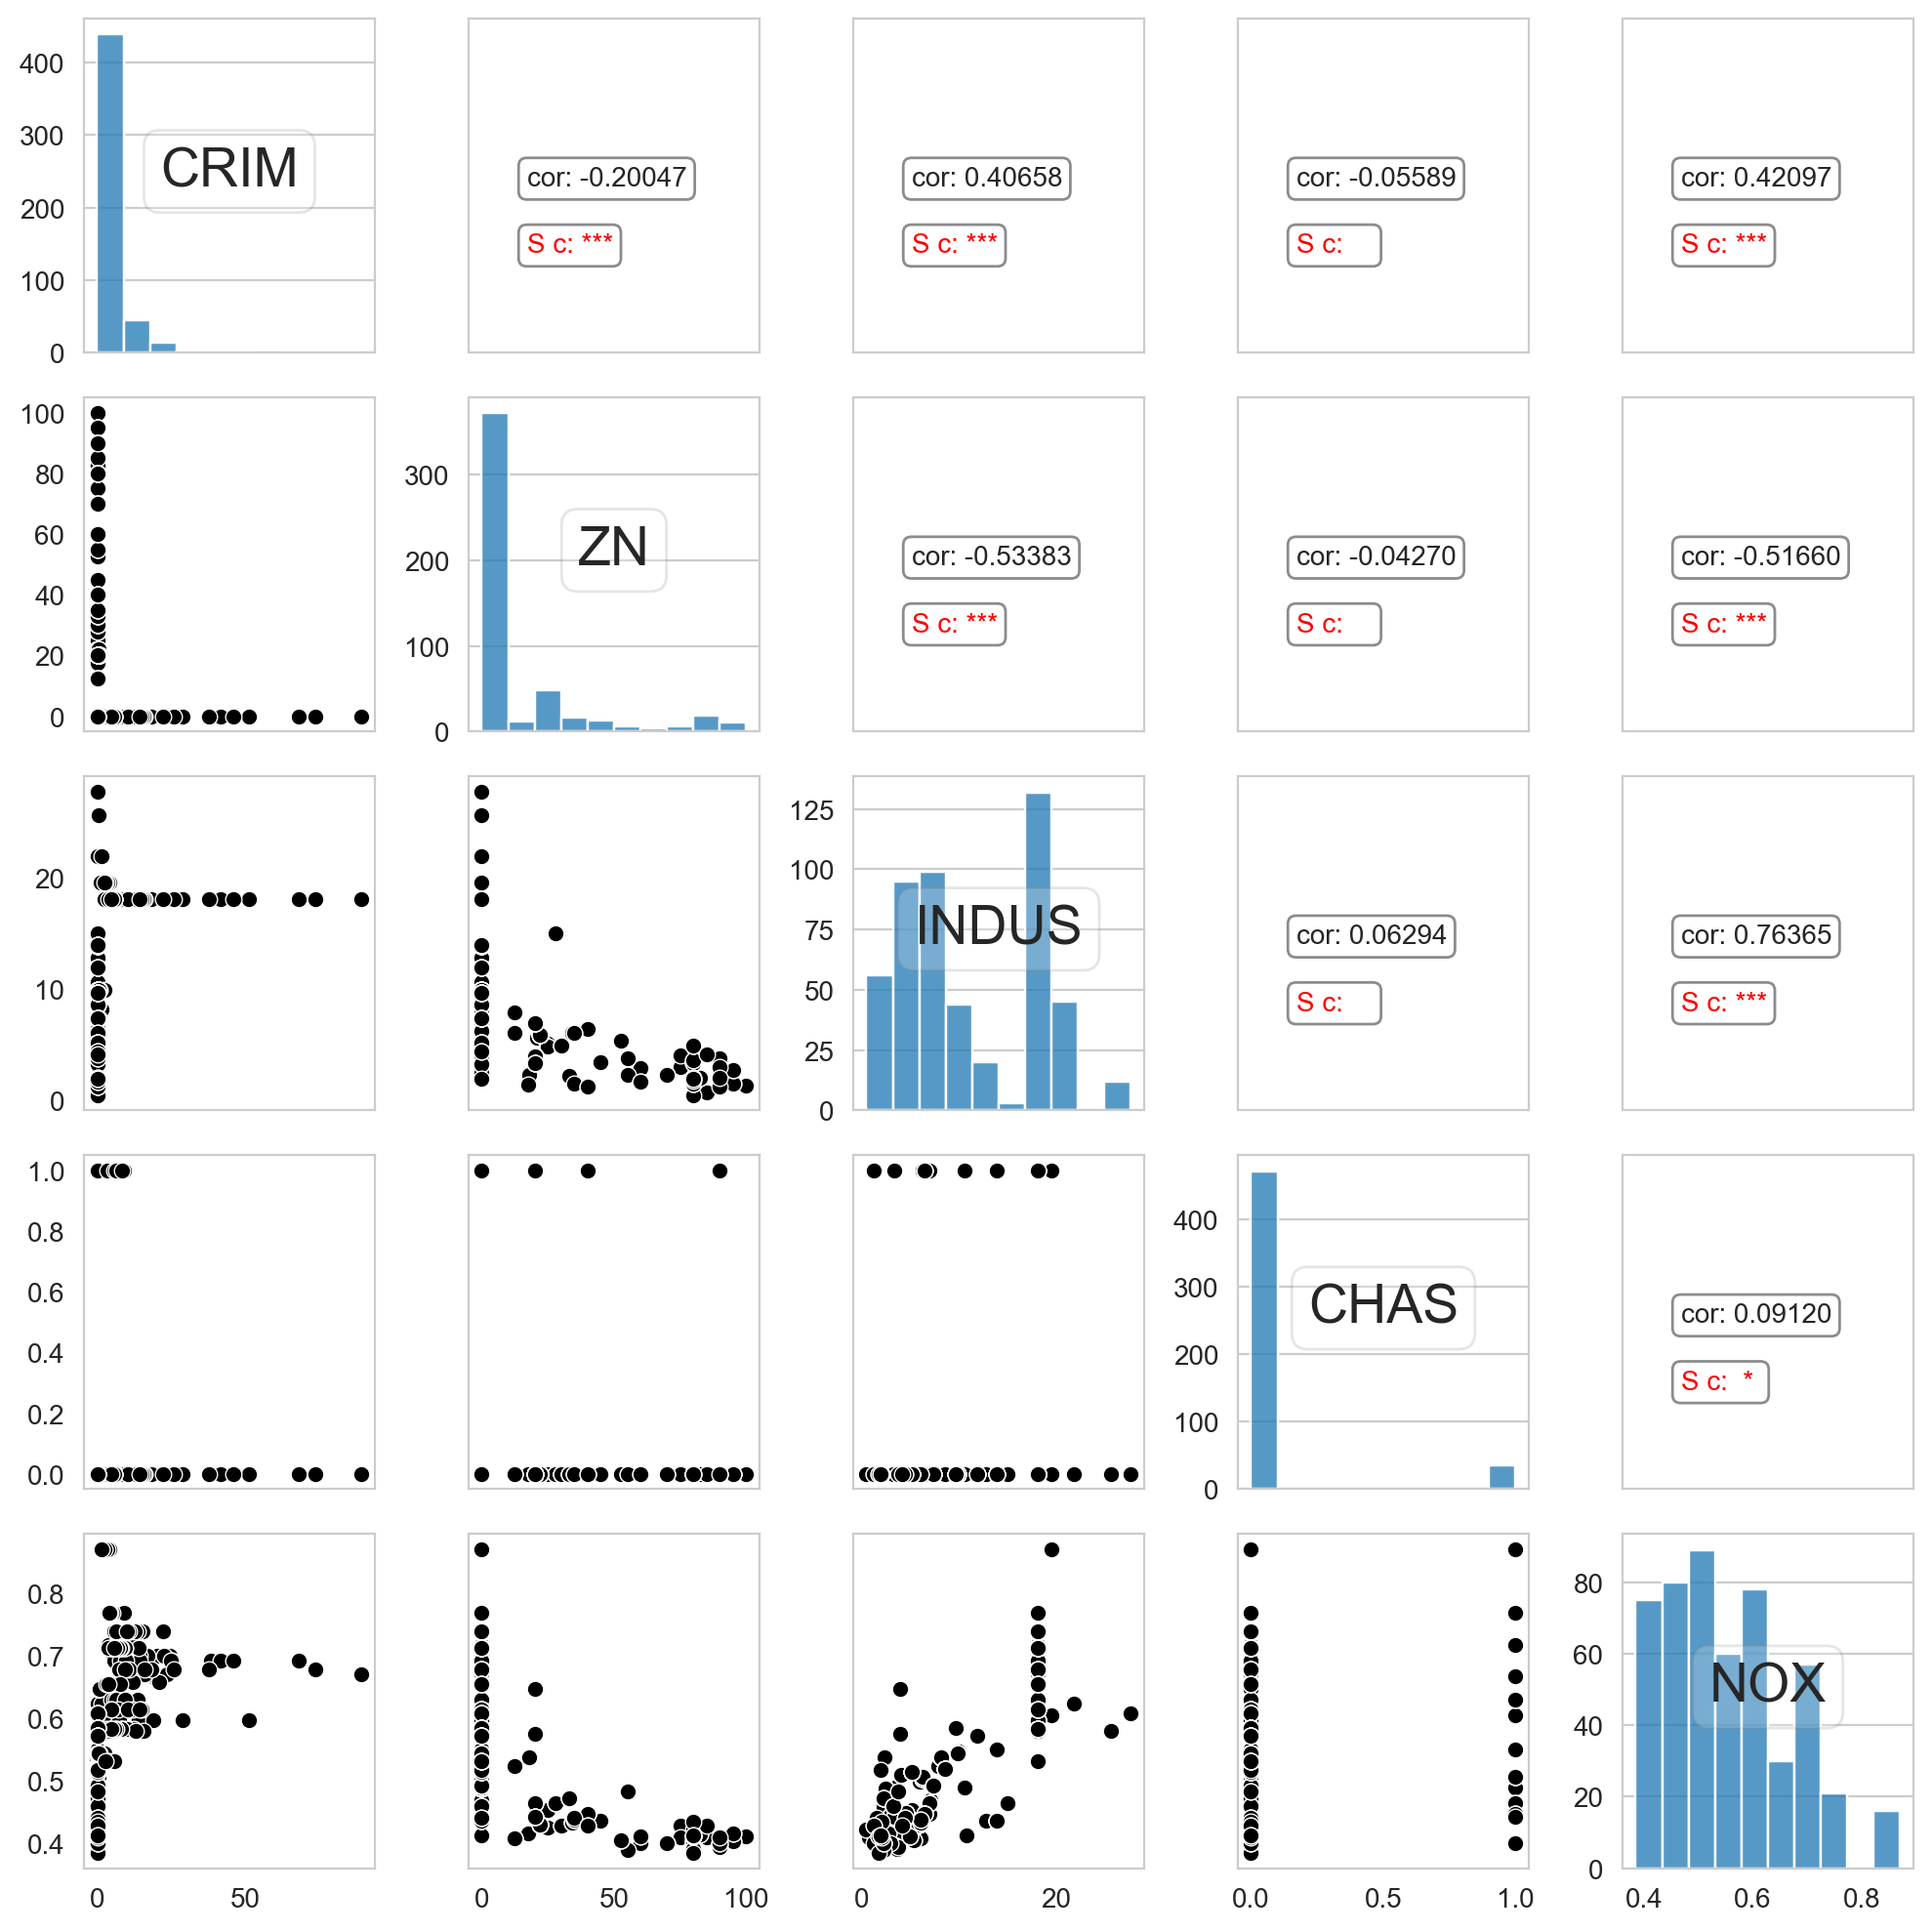

In [5]:

p = Pairs(pdata=xdata, figsize=(10, 10), dpi=200)
fig, ax = p.pairs()
fig.savefig("plot1.png")

## demo2
1. 如果数据维度非常多，建议提高`figsize`的大小，可以从`(10, 10)`，提高到`(30,30)`等。
2. 如果数据维度非常多，建议提高`dpi`的大小，提高到300等

In [6]:
data = load_boston()
xdata = pd.DataFrame(data=data.get('data'), columns=data.get('feature_names'))
xdata = xdata#.iloc[:, :5]
xdata

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [ ]:
p = Pairs(pdata=xdata, figsize=(30, 30), dpi=300)
fig, ax = p.pairs()
fig.savefig("plot2.png")